# Confusion Matrix 1

Die Erstellung der *Confusion Matrix* kann entweder mit *Scikit Learn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oder mit *pandas_ml* (https://pandas-ml.readthedocs.io/en/latest/conf_mat.html) erfolgen. Scikit Learn sollte installiert sein. pandas_ml kann mit folgendem Befehl installiert werden: `conda install -c conda-forge pandas_ml`. Den jeweiligen Import nicht vergessen! Im Rahmen dieser Übung kommt die Scikit Learn-Variante zum Einsatz.

## Umsetzung mit Scikit Learn

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
# actual values
actual = [1,0,0,1,0,0,1,0,0,1]

# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

print(confusion_matrix(actual, predicted))

tn, fp, fn, tp = confusion_matrix(actual, predicted).reshape(-1)
print('TN:', tn, 'FP:', fp, 'FN:', fn, 'FP:', fp)

[[5 1]
 [2 2]]
TN: 5 FP: 1 FN: 2 FP: 1


**Default-Output von `confusion_matrix`:**
        
               Predicted
              true    false
          negative    negative
                 0    1
           0     5    1
    Actual    
           1     2    2
           
> Details liefert die API-Doku: **labels**:...If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

**Output anpassen:**
Möchte man mit '1' (Positiv) beginnen, steht das Argument `labels` zur Verfügung:

In [3]:
print(confusion_matrix(actual, predicted, labels=[1, 0]))
tn, fp, fn, tp = confusion_matrix(actual, predicted).reshape(-1)
# print('TN:', tn, 'FP:', fp, 'FN:', fn, 'FP:', fp) eh nix anders

[[2 2]
 [1 5]]


## Task 15.1
Grundlage bildet Übung 14, Iris Dataset & Random Forest Classifier: Bereiten Sie das Dataset dahingehd auf, dass mit '0' (Setosa) und '1' (Versicolor) nur mehr zwei Klassen enthalten sind. Trainieren Sie im Anschluss wiederum den Random Forest Classifier und erstellen Sie die Confusion Matrix (CM) wie gezeigt. Durch die Reduktion auf zwei Klassen entspricht der CM-Output der uns bekannten Art und Weise.

In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

iris_df = iris_df[iris_df['species'] != 2]

In [7]:
x = iris_df.loc[:, 'sepal length (cm)':'petal width (cm)']
y = iris_df['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

# Create a classifier of type "RandomForest"
clf = RandomForestClassifier(max_depth=10, n_estimators=10, verbose=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

confusion_matrix(y_test, y_pred)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[18,  0],
       [ 0, 12]], dtype=int64)

## Task 15.2
Um die CM ansprechend zu visualisieren, gibt es die Funktion `plot_confusion_matrix` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix). **Wichtig**: Unter Umständen müssen Sie das Scikit Learn Modul aktualisieren, da die Funktion relativ neu ist (`conda update scikit-learn`).

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


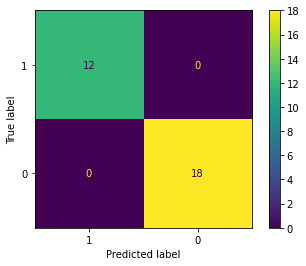

In [9]:
# Verwendung: Es braucht 3 Argumente:
plot_confusion_matrix(clf, x_test, y_test, labels=[1,0])  
plt.show()  